### Assignment Submission - Asset Pricing
> Student Name : Ankit Rawat

> Batch : G2 

In [101]:
### Import Libraries

In [445]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats

In [446]:
### Setup Allignment

In [499]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 110)
pd.set_option("precision", 3)
pd.set_option("max_rows", 10)
pd.set_option("min_rows", 3)

%matplotlib inline

> ## 1. Load Data

In [448]:
data  = pd.read_csv("Industry_Portfolios.csv")

> Data Wragling
>> Verify any null data
>> Date formating 
>> Create copy 

In [474]:
data.isnull().sum()
data["Date"] = pd.to_datetime(data['Date'],format='%Y%m')
df  = data.copy()
df.set_index( "Date", inplace =True)

In [475]:
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")
data_indus_Portfolio  = pd.read_csv("Industry_Portfolios.csv")
df_market_Portfolio.set_index("Date",inplace = True)
data_indus_Portfolio.set_index("Date",inplace = True)

In [476]:
df_ = pd.concat([data_indus_Portfolio,df_market_Portfolio],axis =1)
df  = np.subtract( df_.loc[:,"NoDur":"Other"] , pd.DataFrame(df_["Market"]))

> ### 2.Calculate mean returns

In [477]:
R = pd.DataFrame(df.mean())
R_array = np.array(R)

In [478]:
print ("Expected Mean of the given data is :\n {} ".format(R))

Expected Mean of the given data is :
            0
NoDur  0.155
Durbl -0.015
Manuf  0.265
Enrgy  0.483
HiTec  0.018
Telcm  0.133
Shops  0.168
Hlth   0.036
Utils  0.159
Other -0.259 


> ### 3. Calculate covariance matrix of returns for the ten industry portfolios

In [479]:
Covmatrix = df.cov()
print ("Convariance of the given data is :\n {} ".format(Covmatrix))

Convariance of the given data is :
        NoDur   Durbl  Manuf   Enrgy  HiTec  Telcm  Shops   Hlth   Utils  Other
NoDur  5.440  -6.073 -1.396  -1.201 -1.883  1.539  1.141  3.815   4.272 -1.769
Durbl -6.073  26.629  4.908  -3.481  1.892 -1.708 -0.354 -8.083  -9.617  4.386
Manuf -1.396   4.908  2.950   1.666  0.065 -0.626 -1.155 -2.289  -1.901  0.359
Enrgy -1.201  -3.481  1.666  19.275 -1.517 -1.041 -3.710 -2.486   4.454 -3.865
HiTec -1.883   1.892  0.065  -1.517  5.099 -0.773 -0.245 -1.936  -2.343 -1.404
Telcm  1.539  -1.708 -0.626  -1.041 -0.773  4.683  0.464  0.693   2.721 -1.272
Shops  1.141  -0.354 -1.155  -3.710 -0.245  0.464  4.453  0.765  -0.177 -0.257
Hlth   3.815  -8.083 -2.289  -2.486 -1.936  0.693  0.765  7.820   3.496 -1.727
Utils  4.272  -9.617 -1.901   4.454 -2.343  2.721 -0.177  3.496  12.267 -4.055
Other -1.769   4.386  0.359  -3.865 -1.404 -1.272 -0.257 -1.727  -4.055  4.503 


> ### 4. Standard Deviation of the given data set

In [480]:
Std_Deviation = np.sqrt(np.diagonal(Covmatrix).round(2))
print ("Std_Deviation of the given data is :\n {} ".format(Std_Deviation))

Std_Deviation of the given data is :
 [2.33238076 5.16042634 1.7175564  4.38976081 2.25831796 2.16333077
 2.10950231 2.79642629 3.50285598 2.12132034] 


> ### 4. Validate covariance is Symmetric and positive definite 

In [481]:
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 
print ( " Covariance matrix is Symmetric : \n {}".format(Covmatrix - Covmatrix_array))
print ("\n")
print ( " Covariance matrix is Invertible : \n {}".format(Covmatrix_array.dot(Covmatrix_inverse).round(2)))

 Covariance matrix is Symmetric : 
        NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
NoDur    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Durbl    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Manuf    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Enrgy    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
HiTec    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Telcm    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Shops    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Hlth     0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Utils    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Other    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0


 Covariance matrix is Invertible : 
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.  0.  0.  0. -0.  0.]
 [ 0. -0.  1. 

> ###  5.Create Matrix  : e = (1....1)'

In [482]:
e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)
print ( "e Matrix :  \n {}".format(e))

e Matrix :  
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


> ### 6.Vertical Axis : Mean_Vertical_axis :0% to 0.1% (in increment of 0.0005%)

In [484]:
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,0.1,0.0005))

> ### 7.Find Values for variables  :  Alpha, Zeta and Delta 

In [485]:
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

R_array_Tran = np.array(R).T
zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)

e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))
print ( "Value of  \n Alpha : {} \n and \n Zeta :  {} \n and \n Delta : {} ".format(alpha,zeta,Delta))
print ( "\n Global Minimum Variance of Portfolio  : {} ".format(alpha/Delta))

Value of  
 Alpha : [[2.93212788]] 
 and 
 Zeta :  [[0.20474497]] 
 and 
 Delta : [[58.55025438]] 

 Global Minimum Variance of Portfolio  : [[0.05007882]] 


> ### 9. Functions to perform different calculations 

In [486]:
def Weight_Lagrange_Multipliers(Expected_return):
    
    def Lambda_Cov_R(Expected_return):

        Lambda = np.divide( np.subtract( Delta.dot(Expected_return) , alpha ), np.subtract(zeta.dot(Delta),np.square(alpha)))
        Lambda_Cov_R_value  = np.multiply(Lambda,Covmatrix_inverse).dot(R_array)
        return (Lambda_Cov_R_value)

    def Second_Cov_R(Expected_return):
        y= np.divide(np.subtract(zeta,np.multiply(alpha,(0.02))),np.subtract (zeta.dot(Delta),np.square(alpha)))
        Second_Cov_R_value = np.multiply(y,Covmatrix_inverse).dot(e)
        return (Second_Cov_R_value)
    
    def weight(Expected_return):      
        
        Optimal_weight = pd.DataFrame(np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return)))
        return (Optimal_weight)
     
   
    weight(Expected_return)
    
    return np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return))


def Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(zeta,Covmatrix_inverse).dot(e) - ( np.multiply(alpha,Covmatrix_inverse).dot(R_array)) ,np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(Delta,Covmatrix_inverse).dot(R_array) - ( np.multiply(alpha,Covmatrix_inverse).dot(e)),np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_return):
    
    return np.add(Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta),(Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta)).dot(Expected_return))


def Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Portfolio_Return,Risk_Free_Asset):
    ##(2 - 0.10)/np.sqrt(zeta - 2*alpha*0.13+Delta*np.square(0.13))
    return float((Expected_Portfolio_Return - Risk_Free_Asset)/(np.sqrt(zeta - 2*alpha*Risk_Free_Asset+Delta*np.square(Risk_Free_Asset))).astype(float))

def Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate):
    
    return np.sqrt(zeta - 2*alpha*Riskfree_rate + Delta*np.square(Riskfree_rate))

> ### 9.Standard.Dev Calculation 

In [487]:
df_exp_front = Expected__Mean_Vertical_axis
df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)

In [488]:
#df_exp_front["Exp_Return_Variance"] = pd.DataFrame(df_exp_front.Exp_Return.apply( lambda x : float((Weight_Lagrange_Multipliers(x).T).dot(Covmatrix_array).dot(Weight_Lagrange_Multipliers(x)).astype(float)) ))
#df_exp_front["Exp_Return_St_dev"] = df_exp_front["Exp_Return_Variance"].apply( lambda x : np.sqrt(x))
df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))*np.square(x  - (alpha/Delta))))).astype(float)))

> ### 12.Expected Return of Tangency Portfolio

In [489]:
Expected_Return_Tangent_Portfolio  = (alpha*0- zeta)/((Delta*0)-alpha)
print (" Expected_Return_Tangent_Portfolio  : {}".format(Expected_Return_Tangent_Portfolio))

 Expected_Return_Tangent_Portfolio  : [[0.06982812]]


> ### 13. Standard Deviation of Tangency Portfolio

In [490]:
print ( "Expected_Return of Tangency Portfolio  : {} ".format(Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Return_Tangent_Portfolio,0)))

Expected_Return of Tangency Portfolio  : 0.15432053366443688 


> ### 14.Lambda  with Risk Free asset  for Expected Return

In [491]:
lambda_Risk_Free_Asset = (Expected_Return_Tangent_Portfolio - 0.0)/(zeta - 2 * alpha * 0 + Delta * ( 0.0 ** 2))
print ( "lambda_Risk_Free_Asset Tangency Portfolio : {} ".format(lambda_Risk_Free_Asset))

lambda_Risk_Free_Asset Tangency Portfolio : [[0.34104924]] 


> ### 15.Weight of Portfolio with risk free asset 

In [492]:
((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  0 * e  ))

array([[5.26341943e-02],
       [1.53428449e-04],
       [1.37626709e-01],
       [8.70322403e-02],
       [1.79352886e-01],
       [7.10739711e-02],
       [1.06884468e-01],
       [1.02775950e-01],
       [4.01622131e-02],
       [2.22303939e-01]])

## Information Ratio

In [495]:
Expected_Return_Tangent_Portfolio / Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Return_Tangent_Portfolio,0)

array([[0.45248754]])

> ###  17. Graph

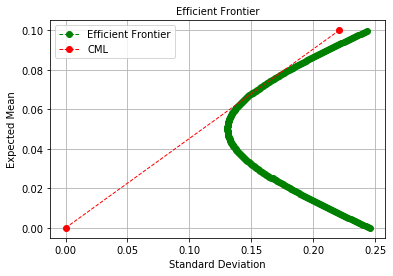

In [514]:
import matplotlib.pyplot as plt
plt.xlabel('Standard Deviation', fontsize=10)
plt.ylabel('Expected Mean', fontsize=10
          )
plt.title( 'Efficient Frontier', fontsize=10 )
Std_dev = [0,Std_deviation_Portfolio_with_RiskfreeAsset(0.1,0)]
Intercept = [ 0,0.1]
plt.plot(df_exp_front.Exp_Return_Std_dev_Rmv,df_exp_front.Exp_Return , color='green', marker='o',linestyle='dashed',linewidth=1,label = "Efficient Frontier")
plt.plot(Std_dev, Intercept, color='red', marker='o',linestyle='dashed',linewidth=1,label = "CML")
plt.legend()
plt.grid()


### Part 2 : Hansen - Jangannathan Bound

In [532]:
import numpy as np
import pandas as pd



In [542]:
nu = [np.log(0.65) if i <= 0.017 else 0 for i in np.random.uniform(size = 10 ** 4)]
epsilon = np.random.standard_normal(10 ** 4)
lng = 0.02 + 0.02 * epsilon + nu
g = np.exp(lng)

std = []
mean = []
for x in gamma:
    m = 0.99 * (g ** (-x))
    std.append(np.std(m))
    mean.append(np.mean(m))

df = pd.DataFrame([gamma,std, mean], index = ["gamma","SD(M)", "E(M)"]).T

df['SD(M)/E(M)'] = df['SD(M)'] / df['E(M)']



### Smallest value of Y for which Std.Deviation / E(M) > 0.4 

In [544]:
min_gamma = df[df['SD(M)/E(M)'] > 0.4]["gamma"].min()
print("The smallest value of gamma is {:.1f} for SD(M)/E(M) > 0.4. ".format(min_gamma))


The smallest value of gamma is 3.3 for SD(M)/E(M) > 0.4. 


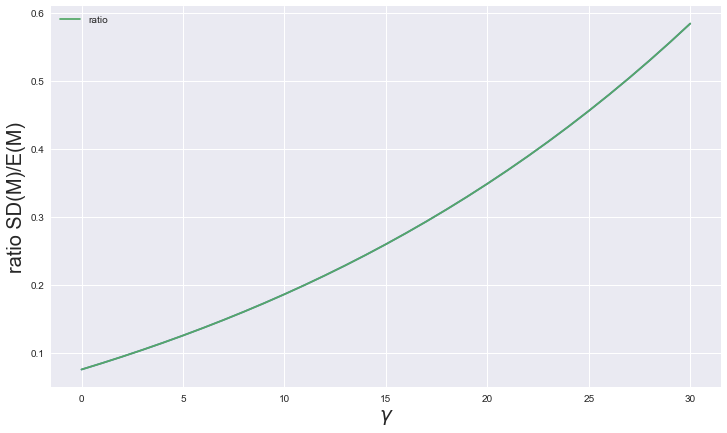

In [550]:
plt.figure(figsize = (12, 7))
plt.plot(df.index, df['SD(M)/E(M)'])
plt.ylabel('ratio SD(M)/E(M)', fontsize = 20)
plt.xlabel(r'$\gamma$', fontsize = 20);
plt.plot(df.index, df['SD(M)/E(M)'], label = "ratio")
plt.legend()

### Significance :
* Graph give us details about the change in ratio expected by customer with change in CRRA (y)
* Hansen -Jagannathan condition satisfies here as smallest value of Y is also greater than 0.4 


In [551]:
pwd

'/Users/ankitrawat/Desktop/smu/Classes/A Y2019:2020_Term_2/Asset-Pricing/6'

In [ ]:
%history -g -f Asset_Pricing_Assignment_G2_Ankit_assignment_3.ipynb